# Introduction

<div class="alert alert-block alert-warning">
<font color=black><br>

**What?** Scraping some data + EDA + fitting model

<br></font>
</div>

# Import modules

In [1]:
import os, sys
from sourceCode import RightMoveScraper
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy
from pandas import set_option
from pylab import rcParams
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
%matplotlib inline
sys.path.append(os.path.dirname(os.getcwd()))

# Checking the object

<div class="alert alert-block alert-info">
<font color=black><br>

- We'd like to collect some data to buidld a regression model.
- We'll scrap some data on the RightMove website. 

<br></font>
</div>

# Starting the scrapping

In [2]:
# URL for all London properties to rent
url = "https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=REGION%5E87490&propertyTypes=&includeLetAgreed=false&mustHave=&dontShow=&furnishTypes=&keywords="

# Instantiate the object
scraper = RightMoveScraper.RightmoveData

# Scrape rightmove
rmd = scraper(url)

In [3]:
# Get all the results
allScrapedData = rmd._get_results()

In [4]:
allScrapedData

,price,type,address,url,agent_url,postcode,number_bedrooms,search_date
0,2383,1 bedroom flat,"Rupert Court, Soho, W1D",http://www.rightmove.co.uk/properties/81587397...,http://www.rightmove.co.uk/estate-agents/agent...,W1D,1.0,2021-08-31 20:48:21.718605
1,2600,2 bedroom flat,"Great Titchfield Street, London, W1W",http://www.rightmove.co.uk/properties/11274611...,http://www.rightmove.co.uk/estate-agents/agent...,W1W,2.0,2021-08-31 20:48:21.718605
2,1690,2 bedroom flat,"Gosling Way, London SW9",http://www.rightmove.co.uk/properties/11274611...,http://www.rightmove.co.uk/estate-agents/agent...,SW9,2.0,2021-08-31 20:48:21.718605
3,1325,1 bedroom flat,"Tooting Bec Road, LONDON",http://www.rightmove.co.uk/properties/11274609...,http://www.rightmove.co.uk/estate-agents/agent...,NaN,1.0,2021-08-31 20:48:21.718605
4,1550,2 bedroom apartment,"Colston Road, East Sheen",http://www.rightmove.co.uk/properties/11274610...,http://www.rightmove.co.uk/estate-agents/agent...,NaN,2.0,2021-08-31 20:48:21.718605
...,...,...,...,...,...,...,...,...
1045,3467,2 bedroom apartment,Circus Apartments E14,http://www.rightmove.co.uk/properties/10684968...,http://www.rightmove.co.uk/estate-agents/agent...,E14,2.0,2021-08-31 20:48:21.718605
1046,2500,3 bedroom end of terrace house,Toye Avenue Whetstone N20,http://www.rightmove.co.uk/properties/11270612...,http://www.rightmove.co.uk/estate-agents/agent...,N20,3.0,2021-08-31 20:48:21.718605
1047,3488,2 bedroom apartment,Circus Apartments E14,http://www.rightmove.co.uk/properties/10684962...,http://www.rightmove.co.uk/estate-agents/agent...,E14,2.0,2021-08-31 20:48:21.718605
1048,2250,4 bedroom flat,"Anderson House, Fountain Road, London, SW17",http://www.rightmove.co.uk/properties/11116206...,http://www.rightmove.co.uk/estate-agents/agent...,SW17,4.0,2021-08-31 20:48:21.718605


In [5]:
allScrapedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            1050 non-null   int64         
 1   type             1050 non-null   object        
 2   address          1050 non-null   object        
 3   url              1050 non-null   object        
 4   agent_url        1047 non-null   object        
 5   postcode         823 non-null    object        
 6   number_bedrooms  1043 non-null   float64       
 7   search_date      1050 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 65.8+ KB


In [6]:
allScrapedData.describe()

,price,number_bedrooms
count,1050.000000,1043.000000
mean,2284.289524,1.755513
std,1610.288927,1.097308
min,150.000000,0.000000
25%,1450.000000,1.000000
50%,1842.000000,2.000000
75%,2578.000000,2.000000
max,17117.000000,7.000000


In [7]:
allScrapedData["postcode"].unique()

array(['W1D', 'W1W', 'SW9', nan, 'N15', 'N13', 'EN2', 'EN1', 'W12', 'SW3',
       'WC1A', 'W1T', 'SW1P', 'SW11', 'N3', 'EC1R', 'NW6', 'E1W', 'SW4',
       'NW8', 'E3', 'NW10', 'SW15', 'SW1V', 'W10', 'W2', 'SW5', 'E13',
       'E14', 'W8', 'SE14', 'SE16', 'N5', 'NW3', 'E9', 'N6', 'SW6',
       'SE10', 'W14', 'SW10', 'W1J', 'W6', 'N8', 'E11', 'E16', 'SW2',
       'W13', 'SE3', 'SW1E', 'SE1', 'W1K', 'W1G', 'SE22', 'SW7', 'W1H',
       'E15', 'E8', 'SE8', 'W11', 'N2', 'SE7', 'E18', 'E5', 'NW2', 'NW5',
       'SE17', 'SE26', 'SE12', 'NW1', 'W4', 'N19', 'SW16', 'W3', 'W5',
       'N4', 'SW8', 'N1', 'SE18', 'N10', 'SE15', 'SE23', 'N21', 'NW7',
       'NW11', 'SE24', 'WC1X', 'E10', 'SE4', 'N16', 'EC1V', 'W9', 'CR0',
       'SW18', 'N17', 'E1', 'N12', 'WC1N', 'WC1H', 'W1', 'E12', 'SW1',
       'E2', 'SE5', 'N7', 'SW14', 'SW1A', 'EC1Y', 'SE19', 'N11', 'WC2H',
       'E17', 'E7', 'NW9', 'SE20', 'SW12', 'SW13', 'EC1A', 'E6', 'SW20',
       'SE11', 'SW19', 'W1F', 'SE6', 'SE13', 'E20', 'SW1Y', 'W7',

In [8]:
allScrapedData["type"].unique()

array(['1 bedroom flat', '2 bedroom flat', '2 bedroom apartment',
       '3 bedroom apartment', '3 bedroom flat',
       '4 bedroom terraced house', '1 bedroom apartment',
       '2 bedroom ground floor flat', 'Garages', '4 bedroom maisonette',
       'Studio flat', '3 bedroom detached house', '2 bedroom house',
       '4 bedroom flat', '3 bedroom house', '3 bedroom cottage',
       '2 bedroom terraced house', 'Flat share', '3 bedroom duplex',
       '2 bedroom bungalow', 'Studio apartment',
       '2 bedroom semi-detached house', '5 bedroom terraced house',
       '3 bedroom semi-detached house', '3 bedroom terraced house',
       '4 bedroom apartment', '3 bedroom maisonette',
       '1 bedroom ground floor flat', '4 bedroom house',
       '1 bedroom house share', '6 bedroom semi-detached house',
       '2 bedroom duplex', '2 bedroom property', '5 bedroom flat',
       '2 bedroom end of terrace house', '3 bedroom penthouse',
       '2 bedroom town house', '1 bedroom maisonette',
     

# Data cleaning 

<div class="alert alert-block alert-info">
<font color=black><br>

- We'll keep only some columns.
- Type needs to be first clean then turned encoded. We'll try to keep only apartment or house.
- The way we do it we classified as apartment if the type containts the string the word "apartment".
- For anything else,, we'll treat the entry as house. This is not very precise but it'll do for now

<br></font>
</div>

In [9]:
allScrapedDataClean = copy.deepcopy(allScrapedData)
allScrapedDataClean.drop(columns = ["address", "url", "agent_url", "search_date"], inplace = True)

In [10]:
allScrapedDataClean

,price,type,postcode,number_bedrooms
0,2383,1 bedroom flat,W1D,1.0
1,2600,2 bedroom flat,W1W,2.0
2,1690,2 bedroom flat,SW9,2.0
3,1325,1 bedroom flat,NaN,1.0
4,1550,2 bedroom apartment,NaN,2.0
...,...,...,...,...
1045,3467,2 bedroom apartment,E14,2.0
1046,2500,3 bedroom end of terrace house,N20,3.0
1047,3488,2 bedroom apartment,E14,2.0
1048,2250,4 bedroom flat,SW17,4.0


In [11]:
for index, row in allScrapedDataClean.iterrows():    
    if "apartment" in row["type"].split():        
        allScrapedDataClean.at[index, "type"] = "apartment"
    else:        
        allScrapedDataClean.at[index, "type"] = "house"

In [12]:
allScrapedDataClean

,price,type,postcode,number_bedrooms
0,2383,house,W1D,1.0
1,2600,house,W1W,2.0
2,1690,house,SW9,2.0
3,1325,house,NaN,1.0
4,1550,apartment,NaN,2.0
...,...,...,...,...
1045,3467,apartment,E14,2.0
1046,2500,house,N20,3.0
1047,3488,apartment,E14,2.0
1048,2250,house,SW17,4.0


<div class="alert alert-block alert-info">
<font color=black><br>

- We'll check for null value and we'll get rid of those row that have one.
- We'll not try to impute their value.

<br></font>
</div>

In [13]:
allScrapedDataClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1050 non-null   int64  
 1   type             1050 non-null   object 
 2   postcode         823 non-null    object 
 3   number_bedrooms  1043 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 32.9+ KB


In [14]:
allScrapedDataClean.dropna(how='any',axis=0, inplace = True) 

In [15]:
allScrapedDataClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 818 entries, 0 to 1049
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            818 non-null    int64  
 1   type             818 non-null    object 
 2   postcode         818 non-null    object 
 3   number_bedrooms  818 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 32.0+ KB


In [16]:
dfc = copy.deepcopy(allScrapedDataClean)

In [17]:
# Just checking the the "nan" was removed
allScrapedDataClean["postcode"].unique()

array(['W1D', 'W1W', 'SW9', 'N15', 'N13', 'EN2', 'EN1', 'W12', 'SW3',
       'WC1A', 'W1T', 'SW1P', 'SW11', 'N3', 'EC1R', 'NW6', 'E1W', 'SW4',
       'NW8', 'E3', 'NW10', 'SW15', 'SW1V', 'W10', 'W2', 'SW5', 'E13',
       'E14', 'W8', 'SE14', 'SE16', 'N5', 'NW3', 'E9', 'N6', 'SW6',
       'SE10', 'W14', 'SW10', 'W1J', 'W6', 'N8', 'E11', 'E16', 'SW2',
       'W13', 'SE3', 'SW1E', 'SE1', 'W1K', 'W1G', 'SE22', 'SW7', 'W1H',
       'E15', 'E8', 'SE8', 'W11', 'N2', 'SE7', 'E18', 'E5', 'NW2', 'NW5',
       'SE17', 'SE26', 'SE12', 'NW1', 'W4', 'N19', 'SW16', 'W3', 'W5',
       'N4', 'SW8', 'N1', 'SE18', 'N10', 'SE15', 'SE23', 'N21', 'NW7',
       'NW11', 'SE24', 'WC1X', 'E10', 'SE4', 'N16', 'EC1V', 'W9', 'CR0',
       'SW18', 'N17', 'E1', 'N12', 'WC1N', 'WC1H', 'W1', 'E12', 'SW1',
       'E2', 'SE5', 'N7', 'SW14', 'SW1A', 'EC1Y', 'SE19', 'N11', 'WC2H',
       'E17', 'E7', 'NW9', 'SE20', 'SW12', 'SW13', 'EC1A', 'E6', 'SW20',
       'SE11', 'SW19', 'W1F', 'SE6', 'SE13', 'E20', 'SW1Y', 'W7', 'SW1

In [18]:
len(allScrapedDataClean["postcode"].unique())

135

<div class="alert alert-block alert-info">
<font color=black><br>

- We'll also check how that data are distributed.
- You can see the value are not distributed uniformally. 
- There is nothing we could have done while scraping for this data as this reflects the marker as per day when the data were collected.

<br></font>
</div>

In [19]:
print("How many entries do we have for apartment?", allScrapedDataClean["type"][allScrapedDataClean["type"] == "apartment"].count())
print("How many entries do we have for house?", allScrapedDataClean["type"][allScrapedDataClean["type"] == "house"].count())

How many entries do we have for apartment? 274
How many entries do we have for house? 544


# Encoding

<div class="alert alert-block alert-info">
<font color=black><br>

- We know have to turn the value into the proper encoding.
- We'll use one-hot encoding for the type.
- we'll use label encoding for the postcode as there are 264 postcodes.

<br></font>
</div>

In [20]:
dfc = pd.get_dummies(allScrapedDataClean, columns = ["type"], sparse=False)

In [21]:
le = preprocessing.LabelEncoder()
dfc['postcode'] = le.fit_transform(dfc.postcode.values)

In [22]:
dfc

,price,postcode,number_bedrooms,type_apartment,type_house
0,2383,112,1.0,0,1
1,2600,120,2.0,0,1
2,1690,105,2.0,0,1
8,1100,31,2.0,0,1
9,1700,30,3.0,0,1
...,...,...,...,...,...
1045,3467,6,2.0,1,0
1046,2500,36,3.0,0,1
1047,3488,6,2.0,1,0
1048,2250,88,4.0,0,1


In [23]:
dfc = dfc.astype("float")

In [24]:
dfc

,price,postcode,number_bedrooms,type_apartment,type_house
0,2383.0,112.0,1.0,0.0,1.0
1,2600.0,120.0,2.0,0.0,1.0
2,1690.0,105.0,2.0,0.0,1.0
8,1100.0,31.0,2.0,0.0,1.0
9,1700.0,30.0,3.0,0.0,1.0
...,...,...,...,...,...
1045,3467.0,6.0,2.0,1.0,0.0
1046,2500.0,36.0,3.0,0.0,1.0
1047,3488.0,6.0,2.0,1.0,0.0
1048,2250.0,88.0,4.0,0.0,1.0


In [25]:
dfc.dtypes

price              float64
postcode           float64
number_bedrooms    float64
type_apartment     float64
type_house         float64
dtype: object

<div class="alert alert-block alert-info">
<font color=black><br>

- We'll see that for a mean of 2k, we get a minimum value of 470 and a  max value of 26000.
- By looking at the percentile we can get a rough idea of what a good range could be.
- We'll not cap the lower one but will certain cap the max  one at 2.5k

<br></font>
</div>

In [26]:
dfc.describe()

,price,postcode,number_bedrooms,type_apartment,type_house
count,818.000000,818.000000,818.000000,818.000000,818.000000
mean,2407.536675,67.451100,1.783619,0.334963,0.665037
std,1750.695817,39.460073,1.093376,0.472266,0.472266
min,173.000000,0.000000,0.000000,0.000000,0.000000
25%,1500.000000,37.000000,1.000000,0.000000,0.000000
50%,1900.000000,65.000000,2.000000,0.000000,1.000000
75%,2648.250000,103.000000,2.000000,1.000000,1.000000
max,17117.000000,134.000000,6.000000,1.000000,1.000000


# EDA

## Correlation

<div class="alert alert-block alert-info">
<font color=black><br>

- Categorical features ( not numerical ) are ignored during this process due to their nature of not being continuous. 
- This is valid (apparently) also after you used some sort of encoding.
- It makes no sense to say if categorical_var1 is increased by one , categorical_var2 also increases by X ( X's value depends on the correlation between the 2 variables ).
- [See discussion here](https://datascience.stackexchange.com/questions/62427/why-is-pandas-corr-deleting-columns)
                                                                                                           
<br></font>
</div>

In [27]:
set_option('precision', 5) 
dfc.corr(method = 'pearson')
#dfc.corr(method = "kendall")
corr = allScrapedDataClean.corr()

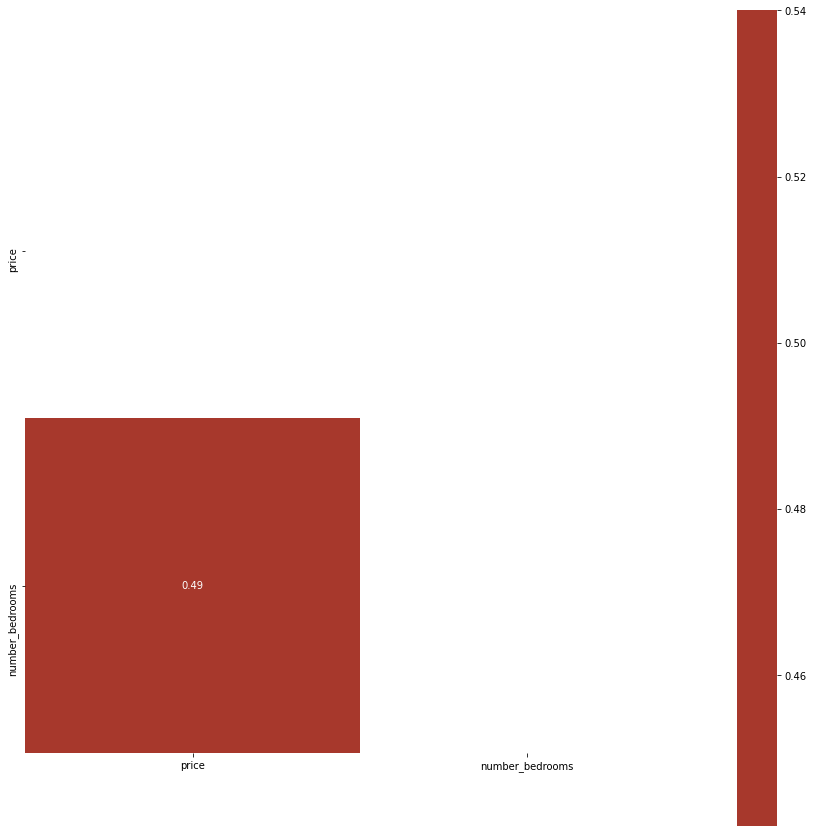

In [28]:
# Create a mask
rcParams['font.size'] = 10
mask = np.triu(np.ones_like(corr, dtype = bool))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
plt.figure(figsize=(15, 15))
sns.heatmap(corr, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)
plt.show()

## Histogram

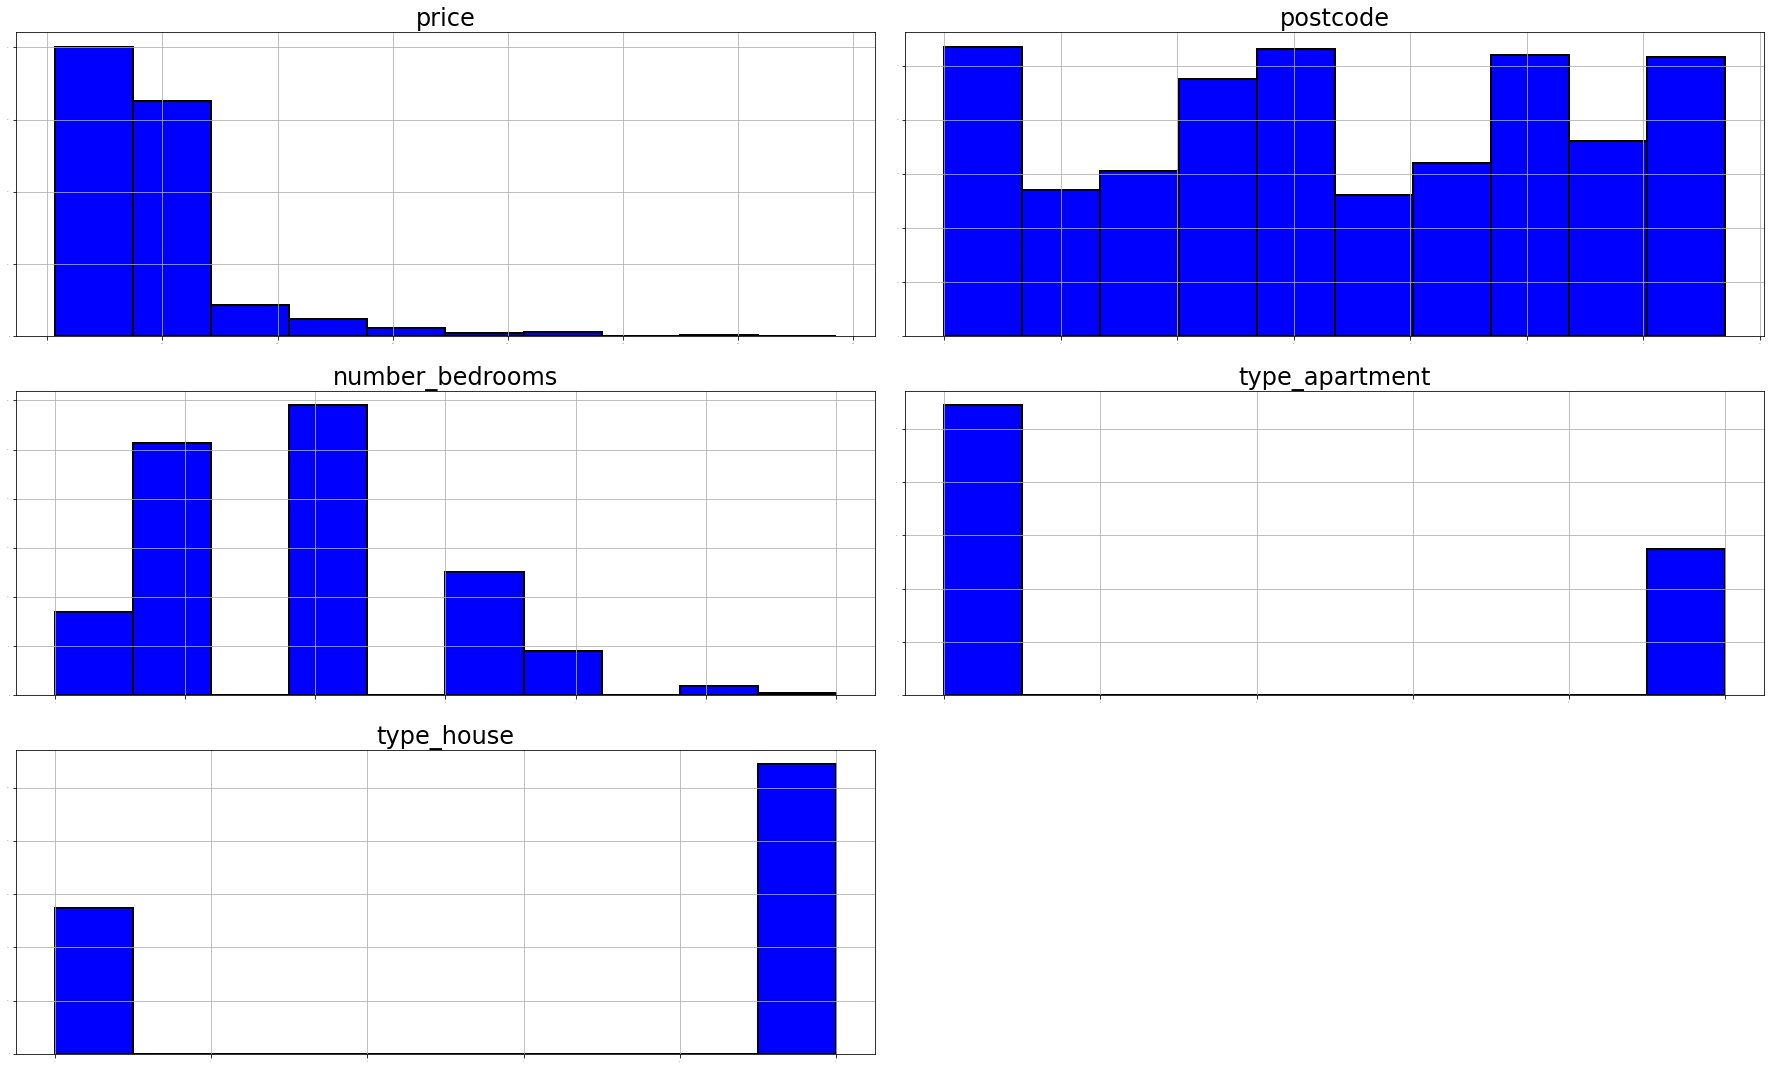

In [29]:
rcParams['figure.figsize'] = 25, 55
rcParams['font.size'] = 20
dfc.hist(sharex=False, sharey=False, xlabelsize=1,
        ylabelsize=1, color = 'blue', edgecolor = 'black', 
        lw = 2, layout = (11,2))
plt.tight_layout()
plt.grid(True)
plt.show()

## Density plot

<div class="alert alert-block alert-info">
<font color=black><br>

- From the density plot below there seems to be some negative price! We'll check for it.
- Also the same price curve distribution seems to have a very long tail.
- this begs the questions whether we can cap the curve? 
- Before we do this, it would best to see how many point are above the mean + 3*sigma just ot detect the outliers. 
- This is actually a quite common opption, but I'd like to suggest something different **quantile**

<br></font>
</div>

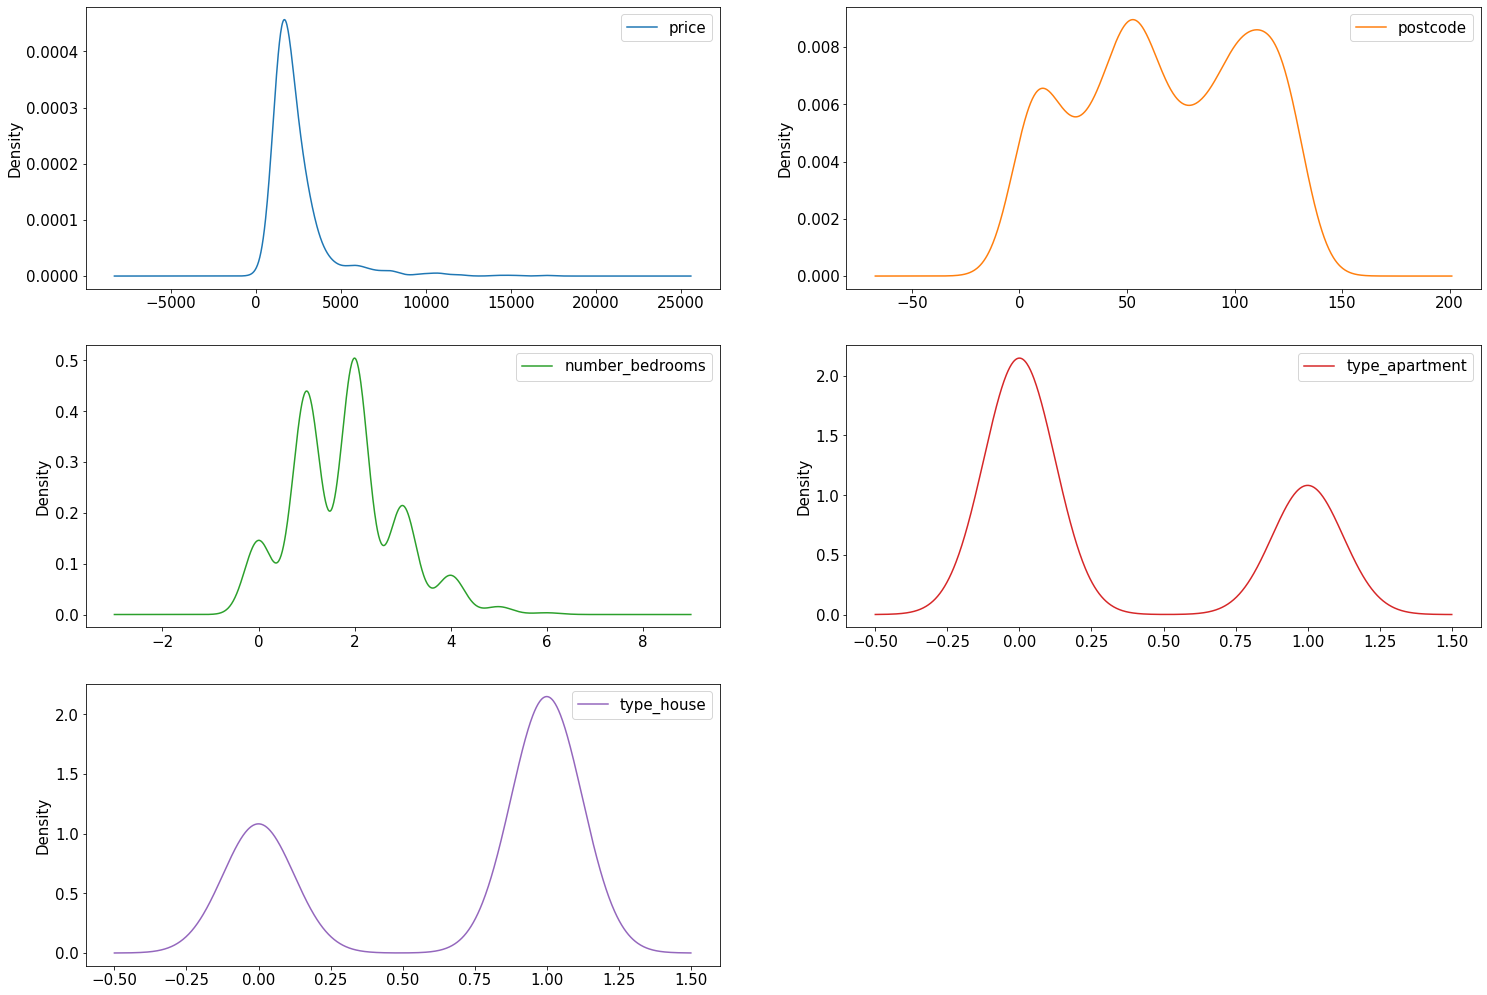

In [30]:
rcParams['font.size'] = 15
rcParams['figure.figsize'] = 25, 55
dfc.plot(kind = 'density', subplots=True, layout=(9,2), sharex=False) 
plt.show()

In [31]:
dfc.describe()

,price,postcode,number_bedrooms,type_apartment,type_house
count,818.00000,818.00000,818.00000,818.00000,818.00000
mean,2407.53667,67.45110,1.78362,0.33496,0.66504
std,1750.69582,39.46007,1.09338,0.47227,0.47227
min,173.00000,0.00000,0.00000,0.00000,0.00000
25%,1500.00000,37.00000,1.00000,0.00000,0.00000
50%,1900.00000,65.00000,2.00000,0.00000,1.00000
75%,2648.25000,103.00000,2.00000,1.00000,1.00000
max,17117.00000,134.00000,6.00000,1.00000,1.00000


## Scatter matrix

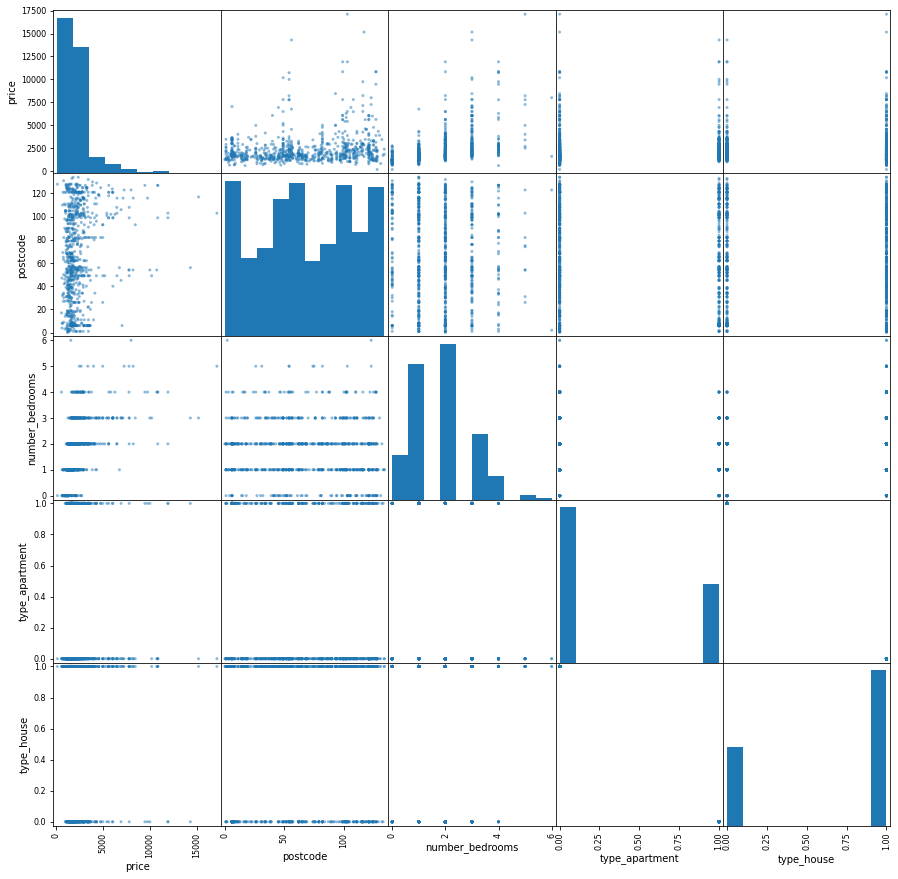

In [32]:
rcParams['figure.figsize'] = 15, 15
rcParams['font.size'] = 10
scatter_matrix(dfc)
plt.show()

## Conclusion

<div class="alert alert-block alert-danger">
<font color=black><br>

- We have one target = rent pcm
- Given a postcode, no of bedrrom and type of accomodation we'd like to predict the price. 
- The relationship between the data are very much non-linear.

<br></font>
</div>

# Split the dataset

In [33]:
X = dfc.drop(columns = ["price"])
features = [singleFeature for singleFeature in dfc.columns if singleFeature not in ["price"]]
y = dfc.drop(columns = features)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.2, shuffle = True)
print(len(X_train))
print(len(X_test))

654
164


In [35]:
y_train

,price
214,2947.0
57,5633.0
400,7150.0
791,1300.0
401,1733.0
...,...
983,3878.0
247,1928.0
792,1096.0
709,2150.0


In [36]:
y_train.values.ravel()

array([ 2947.,  5633.,  7150.,  1300.,  1733.,  1400.,  1629.,  1350.,
        2687.,  2817.,  1599.,  1669.,  2700.,  2145.,  5612.,  9750.,
        4312.,  1603.,  1950.,  1582.,  1600.,  2500.,  1750.,  8450.,
        3878.,  2817.,  1062.,  1800.,  1419.,  1750.,  1800.,  2297.,
        1450.,  2296.,  1249.,  4312.,   828.,  1000.,  2492.,  2492.,
        2100.,  1850.,  2578.,  1850.,  1950.,  1250.,  1235.,  2600.,
        2102.,  1668.,  2925., 11917.,  2340.,  4996.,  1495.,  1200.,
        2900.,  1430.,  1825.,  3683.,  2600.,  1300.,  2383.,  2197.,
        1690.,  1950.,  1907.,  1409.,  9468.,  2300.,  1150.,  2249.,
        1525.,   850.,  2145.,  2000.,  1495.,  1595.,  2253.,  2383.,
        1450.,  3033.,  3900.,  2166.,  2145.,  2550.,  2903.,  2925.,
        1647.,  2015.,  2275.,  1600.,  2773.,  1550.,  1970.,  1100.,
        1127.,  7778., 15167.,  1447.,  1400.,  1225.,   173.,  1700.,
         800.,  1675.,  3445.,  1175.,  2100., 10833.,  1235.,  1998.,
      

# Modelling

In [37]:
model = GradientBoostingRegressor()
# Get the default model parameters
model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [38]:
model.fit(X_train, y_train.values.ravel())
preds = model.predict(X_test)
preds_train = model.predict(X_train)

In [39]:
r2_s = r2_score(y_test, preds)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds)

print("MidModel [MSE]_test20%: ", mse)
print("MidModel [RMSE]_test20%: ", rmse)
print("MidModel [MAE]_test20%: ", mae)
print("MidModel [R2]_test20%: ", r2_s)

MidModel [MSE]_test20%:  1860516.619326491
MidModel [RMSE]_test20%:  1364.0075583831972
MidModel [MAE]_test20%:  769.6117646056528
MidModel [R2]_test20%:  0.270038849906834


<div class="alert alert-block alert-info">
<font color=black><br>

- We're going to look at two plots.
- One we'll look at how well we are predicting the newly seen data. 
- The other we'll look at the how well we are fitting the training data. In fact, one of the thing that is generally suggested is to see if you can **intentionally overfit the training data**. If you are not able to then there is something is wrong. Believe it or not, it is mentioned everywhere but I rarely see it done. 

<br></font>
</div>

In [40]:
results = pd.DataFrame()
results['Target'] = y_test["price"]
results['Pred'] = preds
results.sort_values(by = ['Target'], inplace = True)

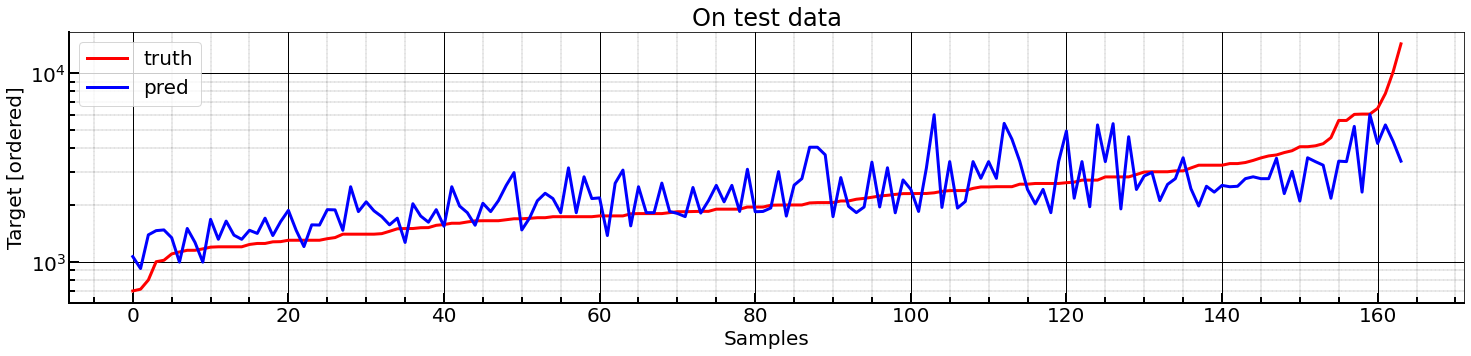

In [48]:
fig, ax = plt.subplots()
rcParams['figure.figsize'] = 25, 5
rcParams['font.size'] = 20
plt.title("On test data")
dummy = range(len(results["Pred"].values))
ax.plot(dummy, results["Target"].values, "-r", lw = 3, label = "truth")
ax.plot(dummy, results["Pred"].values, "-b", lw = 3, label = "pred")

ax.grid(which = "major", linestyle='-', linewidth='1.0', color='k')
ax.grid(which = "minor", linestyle='--', linewidth='0.25', color='k')
ax.tick_params(which = 'major', direction='in', length=10, width=2)
ax.tick_params(which = 'minor', direction='in', length=6, width=2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.minorticks_on()
ax.set_xlabel("Samples")
ax.set_ylabel("Target [ordered]")

plt.yscale('log')
plt.legend()
plt.show()

In [42]:
results_train = pd.DataFrame()
results_train['Target'] = y_train["price"]
results_train['Pred'] = preds_train
results_train.sort_values(by = ['Target'], inplace = True)

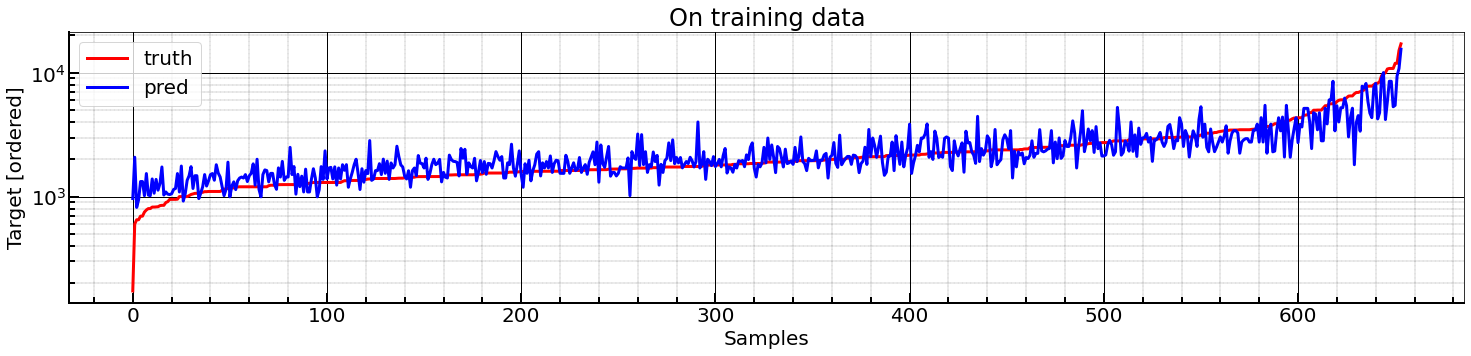

In [43]:
fig, ax = plt.subplots()
rcParams['figure.figsize'] = 25, 5
rcParams['font.size'] = 20
plt.title("On training data")
dummy = range(len(results_train["Pred"].values))
ax.plot(dummy, results_train["Target"].values, "-r", lw = 3, label = "truth")
ax.plot(dummy, results_train["Pred"].values, "-b", lw = 3, label = "pred")

ax.grid(which = "major", linestyle='-', linewidth='1.0', color='k')
ax.grid(which = "minor", linestyle='--', linewidth='0.25', color='k')
ax.tick_params(which = 'major', direction='in', length=10, width=2)
ax.tick_params(which = 'minor', direction='in', length=6, width=2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.minorticks_on()
ax.set_xlabel("Samples")
ax.set_ylabel("Target [ordered]")

plt.yscale('log')
plt.legend()
plt.show()

# Some fiddling with the model

<div class="alert alert-block alert-info">
<font color=black><br>

- From the plotting obtained above we can seen that:
- The performance on the test set is very poor.
- The performance on the train set is also very poor and obvisouly we are not overfitting. We are simpling very far awat from a satisfactory results.
- Just to get an idea of how tunable the model is, and if there is any hope of improving we'are going to play with 3 parameters:
**n_estimators, learning_rate, max_depth**.
- The alternative is to do a full hyperparameter search but that is expensive.

<br></font>
</div>

In [44]:
for dummy in [50, 100, 150, 200, 250, 300]:
    print(dummy)
    model = GradientBoostingRegressor(n_estimators = dummy)

    model.fit(X_train, y_train.values.ravel())
    preds = model.predict(X_test)
    preds_train = model.predict(X_train)

    r2_s = r2_score(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, preds)

    #print("MidModel [MSE]_test20%: ", mse)
    #print("MidModel [RMSE]_test20%: ", rmse)
    print("MidModel [MAE]_test20%: ", mae)
    print("MidModel [R2]_test20%: ", r2_s)
    print("================")

50
MidModel [MAE]_test20%:  827.0031706139239
MidModel [R2]_test20%:  0.18471451021573182
100
MidModel [MAE]_test20%:  769.204750975711
MidModel [R2]_test20%:  0.27028359852344586
150
MidModel [MAE]_test20%:  744.6719023746081
MidModel [R2]_test20%:  0.2948473339699217
200
MidModel [MAE]_test20%:  738.5959417035363
MidModel [R2]_test20%:  0.2802728517710813
250
MidModel [MAE]_test20%:  738.1326161328464
MidModel [R2]_test20%:  0.2737905699379619
300
MidModel [MAE]_test20%:  742.3443329824115
MidModel [R2]_test20%:  0.26355291578884943


In [45]:
for dummy in [0.001, 0.01, 0.1, 0.5, 0.8, 1, 1.1, 2, 3, 5]:
    print("--->>>", dummy)
    model = GradientBoostingRegressor(learning_rate = dummy)

    model.fit(X_train, y_train.values.ravel())
    preds = model.predict(X_test)
    preds_train = model.predict(X_train)

    r2_s = r2_score(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, preds)

    #print("MidModel [MSE]_test20%: ", mse)
    #print("MidModel [RMSE]_test20%: ", rmse)
    print("MidModel [MAE]_test20%: ", mae)
    print("MidModel [R2]_test20%: ", r2_s)
    print("================")

--->>> 0.001
MidModel [MAE]_test20%:  933.7160932843263
MidModel [R2]_test20%:  0.042041992721507104
--->>> 0.01
MidModel [MAE]_test20%:  880.0491838018855
MidModel [R2]_test20%:  0.13658595386003203
--->>> 0.1
MidModel [MAE]_test20%:  769.204750975711
MidModel [R2]_test20%:  0.27028359852344586
--->>> 0.5
MidModel [MAE]_test20%:  744.242734037676
MidModel [R2]_test20%:  0.2527573772460908
--->>> 0.8
MidModel [MAE]_test20%:  761.791093619609
MidModel [R2]_test20%:  0.223124516524994
--->>> 1
MidModel [MAE]_test20%:  773.6289945685734
MidModel [R2]_test20%:  0.16903346573462896
--->>> 1.1
MidModel [MAE]_test20%:  836.807286735834
MidModel [R2]_test20%:  0.13772019515503642
--->>> 2
MidModel [MAE]_test20%:  1196.0628502507848
MidModel [R2]_test20%:  -0.3213562763998459
--->>> 3
MidModel [MAE]_test20%:  1.0360489898045658e+33
MidModel [R2]_test20%:  -8.683410344580689e+59
--->>> 5
MidModel [MAE]_test20%:  1.2036390675951736e+63
MidModel [R2]_test20%:  -1.1644478437952908e+120


In [46]:
for dummy in [2,3,4,5,6,7,8,9,10]:
    print("--->>>", dummy)
    model = GradientBoostingRegressor(max_depth = dummy)

    model.fit(X_train, y_train.values.ravel())
    preds = model.predict(X_test)
    preds_train = model.predict(X_train)

    r2_s = r2_score(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, preds)

    #print("MidModel [MSE]_test20%: ", mse)
    #print("MidModel [RMSE]_test20%: ", rmse)
    print("MidModel [MAE]_test20%: ", mae)
    print("MidModel [R2]_test20%: ", r2_s)
    print("================")

--->>> 2
MidModel [MAE]_test20%:  837.8172568335569
MidModel [R2]_test20%:  0.14555625604545175
--->>> 3
MidModel [MAE]_test20%:  769.204750975711
MidModel [R2]_test20%:  0.27028359852344586
--->>> 4
MidModel [MAE]_test20%:  758.3845197055415
MidModel [R2]_test20%:  0.22406087473312009
--->>> 5
MidModel [MAE]_test20%:  789.9148940325982
MidModel [R2]_test20%:  0.1798827738146045
--->>> 6
MidModel [MAE]_test20%:  845.0643778291841
MidModel [R2]_test20%:  0.06832486280705541
--->>> 7
MidModel [MAE]_test20%:  849.9855098142185
MidModel [R2]_test20%:  0.06602191623833975
--->>> 8
MidModel [MAE]_test20%:  875.7515551162527
MidModel [R2]_test20%:  0.013267680491267142
--->>> 9
MidModel [MAE]_test20%:  878.3607726369769
MidModel [R2]_test20%:  0.03568487132151055
--->>> 10
MidModel [MAE]_test20%:  891.3994467063653
MidModel [R2]_test20%:  0.018060851227236663


<div class="alert alert-block alert-info">
<font color=black><br>

- From our manual and not efficient search we saw that
- optimal: learning_rate = 0.5
- optimal: max_depth = 6
- optimal: n_estimators = 200
- What happens if we combine all of them? We can expect that the optimal univariate values would perform well when merged.
- In fact, they don't!
- Also just to give an idea the MAE is telling us that we are making an error of over £500! Obviusly the model is not good.

<br></font>
</div>

In [47]:
model = GradientBoostingRegressor(max_depth = 6, n_estimators = 200, learning_rate = 0.5)

model.fit(X_train, y_train.values.ravel())
preds = model.predict(X_test)
preds_train = model.predict(X_train)

r2_s = r2_score(y_test, preds)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds)

#print("MidModel [MSE]_test20%: ", mse)
#print("MidModel [RMSE]_test20%: ", rmse)
print("MidModel [MAE]_test20%: ", mae)
print("MidModel [R2]_test20%: ", r2_s)


MidModel [MAE]_test20%:  877.0475003981137
MidModel [R2]_test20%:  -0.00014633099227001622


# References

<div class="alert alert-block alert-warning">
<font color=black><br>

- https://github.com/toby-p/rightmove_webscraper.py

<br></font>
</div>

# Conclusions

<div class="alert alert-block alert-danger">
<font color=black><br>

- Some data was scrapped from RightMove.
- The data was clean and the necessary features were encodeded.
- From the scatter_matrix plot we can see that no clear trend could be capture.
- There is a possibility that maybe some feature engineering could here help.
- I can suggest that maybe talking to some estate agent could prove helpful as he/she may revail the key to correlate the data.
- The only reason why I tried some model was for pure curiosity.

<br></font>
</div>